In [766]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [767]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Handling missing values**

In [768]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [769]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [770]:
foo = df['Precip Type'].copy()
foo.fillna('Unknown',inplace=True)

<AxesSubplot:xlabel='Precip Type', ylabel='count'>

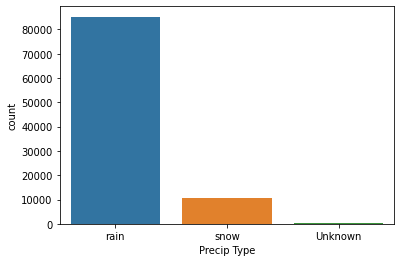

In [771]:
sns.countplot(x=foo)

In [772]:
foo.value_counts()

rain       85224
snow       10712
Unknown      517
Name: Precip Type, dtype: int64

In [773]:
df['Precip Type'] = foo

In [774]:
foo = df[['Precip Type', 'Temperature (C)']]

In [775]:
foo = foo.groupby('Precip Type').mean()


In [776]:
#if the unknown type was no precip at all, the temps should have been higher. 
#Dropping those rows since they are also very rare
foo

,Temperature (C)
Precip Type,
Unknown,10.393015
rain,13.852989
snow,-3.270885


In [777]:
df = df[df['Precip Type']!='Unknown']

In [778]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [779]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

**Handling Summary**

In [780]:
foo = df['Summary'].to_numpy()
for i in range(foo.shape[0]):
    a = foo[i].lower()
    if 'mostly cloudy' in a:
        foo[i] = 1
        
    elif 'partly cloudy' in a:
        foo[i] = 2
    
    elif 'overcast' in a:
        foo[i] = 3
    
    elif 'foggy' in a:
        foo[i] = 4
    
    elif 'clear' in a:
        foo[i] = 5
    else:
        foo[i] = 0 
df['Summary'] = foo

In [781]:
df['Summary'].unique()

array([2, 1, 3, 4, 5, 0], dtype=object)

In [782]:
df.shape

(95936, 12)

**Handling Dates**

In [783]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)

In [784]:
# the means of the years are not diverging from each other
# I will just drop the rows with 2015
df['year'] = df['Formatted Date'].dt.year
df = df[df['year']!=2015]

In [785]:
df['month'] = df['Formatted Date'].dt.month
df['day'] = df['Formatted Date'].dt.day

In [786]:
df = df.drop(columns=['Formatted Date','year'])

In [787]:
#Daily Summary is not very different than summary so will just drop that column
df = df.drop(columns=['Daily Summary'])

In [788]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),month,day
0,2,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,3,31
1,2,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,3,31
2,1,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,4,1
3,2,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,4,1
4,1,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,4,1


In [789]:
#getting dummy variables
pd.get_dummies(df,columns=['Precip Type'],drop_first=True)

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),month,day,Precip Type_snow
0,2,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,3,31,0
1,2,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,3,31,0
2,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,4,1,0
3,2,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,4,1,0
4,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,9,9,0
96449,2,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,9,9,0
96450,2,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,9,9,0
96451,2,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,9,9,0


**Numerical Variables**

<AxesSubplot:>

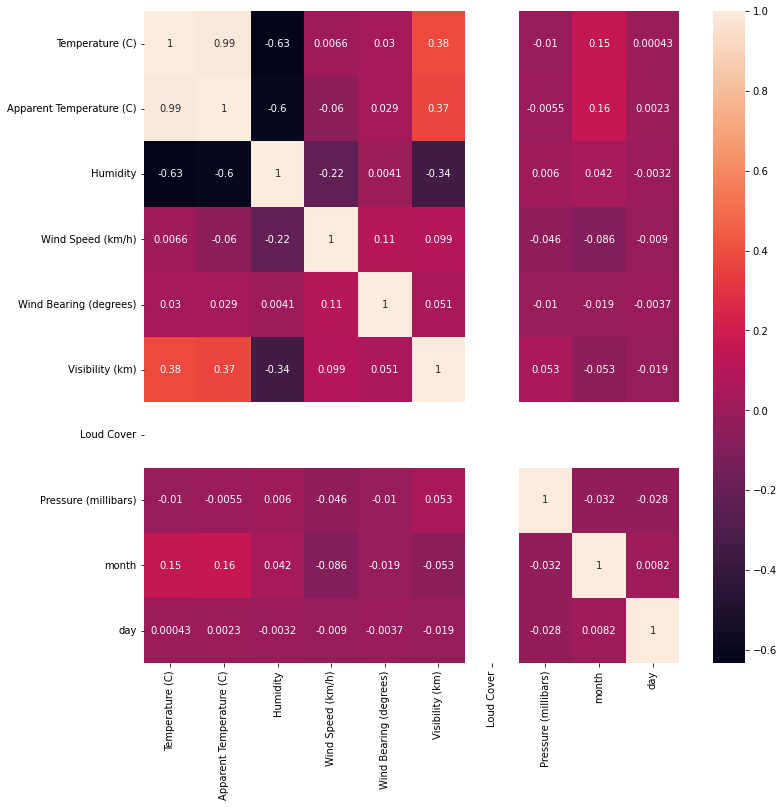

In [790]:
f,ax= plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [791]:
#Lout cover is all zeros
df['Loud Cover'].unique()

array([0.])

In [792]:
df = df.drop(columns=['Loud Cover'])

In [793]:
#Apparent Temperature is highly correlated with temperature so dropping it
df = df.drop(columns=['Apparent Temperature (C)'])

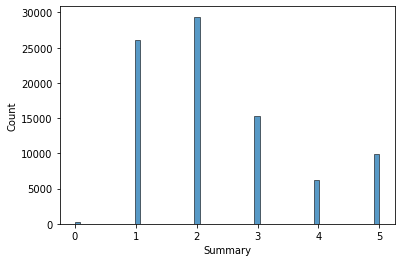

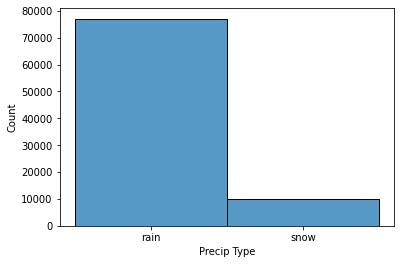

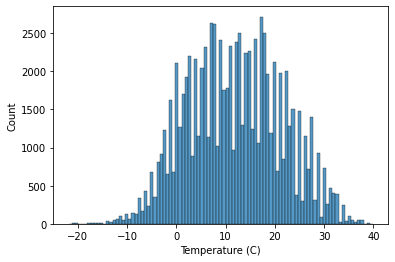

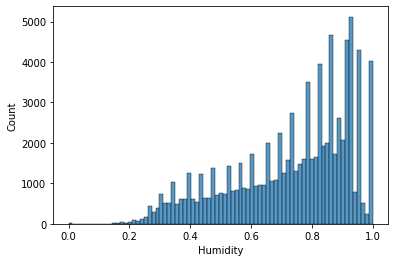

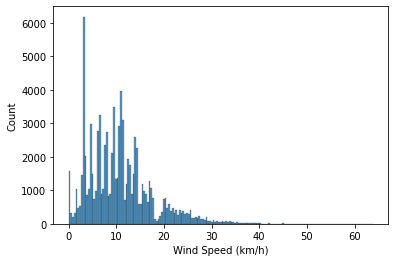

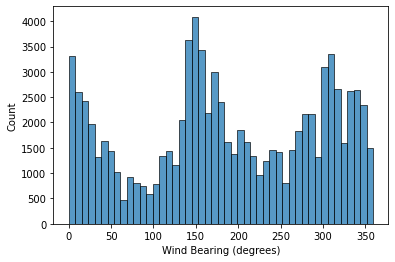

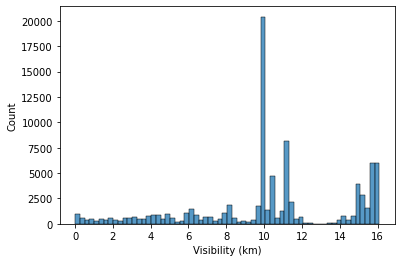

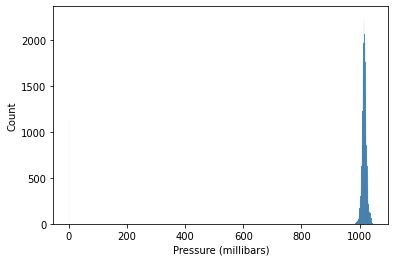

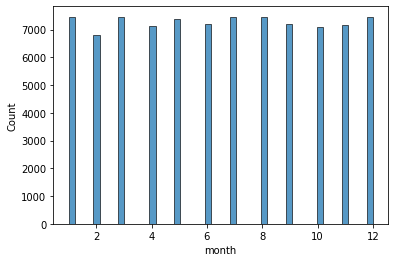

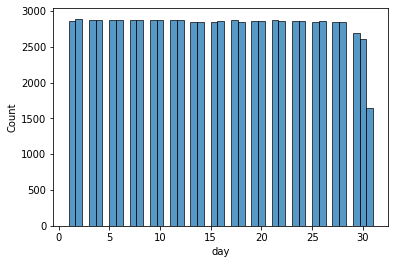

In [794]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

In [795]:
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month,day
0,2,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,3,31
1,2,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,3,31
2,1,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,1
3,2,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,4,1
4,1,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,1
...,...,...,...,...,...,...,...,...,...,...
96448,2,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,9
96449,2,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,9
96450,2,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,9
96451,2,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,9


<AxesSubplot:xlabel='Humidity', ylabel='Count'>

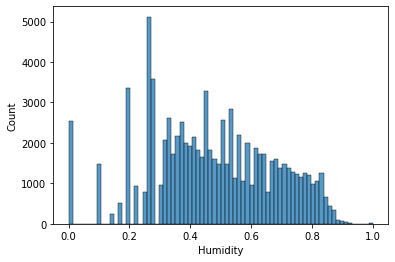

In [796]:
#Reflecting Humidity and square root transforming

df['Humidity'] = max(df['Humidity'])-df['Humidity']
df['Humidity'] = np.sqrt(df['Humidity'])
sns.histplot(df['Humidity'])

<AxesSubplot:>

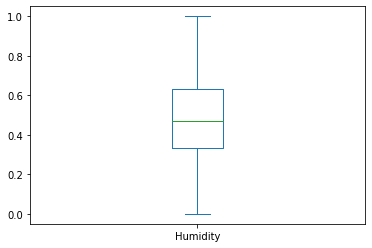

In [797]:
df['Humidity'].plot.box()

In [798]:
df['Humidity'].describe()

count    87176.000000
mean         0.473000
std          0.202929
min          0.000000
25%          0.331662
50%          0.469042
75%          0.632456
max          1.000000
Name: Humidity, dtype: float64

<AxesSubplot:>

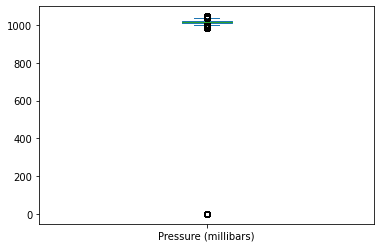

In [799]:
#Too many zeros replacing them with the median since there many outliers 
df['Pressure (millibars)'].plot.box()

In [800]:
foo = df['Pressure (millibars)'].copy()
foo[foo==0] = foo.median()

In [801]:
df['Pressure (millibars)'] = foo

<AxesSubplot:>

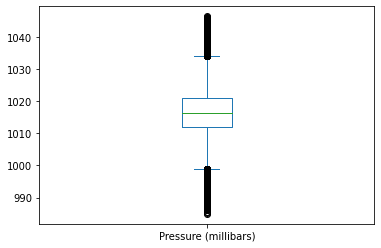

In [802]:
df['Pressure (millibars)'].plot.box()

<AxesSubplot:ylabel='Frequency'>

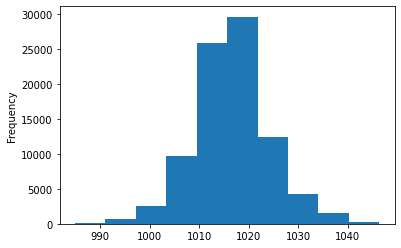

In [803]:
df['Pressure (millibars)'].plot.hist()

In [804]:
y = df.pop('Temperature (C)')

In [805]:
y.describe()

count    87176.000000
mean        11.903684
std          9.590244
min        -21.822222
25%          4.637500
50%         12.022222
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

In [806]:
#center y
#y = (y-min(y))/(max(y)-min(y))

In [807]:
df.head()

,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month,day
0,2,rain,0.331662,14.1197,251.0,15.8263,1015.13,3,31
1,2,rain,0.374166,14.2646,259.0,15.8263,1015.63,3,31
2,1,rain,0.331662,3.9284,204.0,14.9569,1015.94,4,1
3,2,rain,0.412311,14.1036,269.0,15.8263,1016.41,4,1
4,1,rain,0.412311,11.0446,259.0,15.8263,1016.51,4,1


In [808]:
df = pd.get_dummies(df,columns=['Precip Type'],drop_first=True)

In [809]:
#x = df[['Summary','Humidity','Pressure (millibars)','month','day','Precip Type_snow']]
#The lowest r2 score is by just using Humidity
x = df[['Humidity']]

In [810]:
#normalize x
x = (x-x.mean())/x.std()

In [811]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [812]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=66)

In [813]:
lr = LinearRegression().fit(x_train,y_train)

In [814]:
predict = lr.predict(x_test)

In [815]:
print("MSE = ",mean_squared_error(y_test, predict))
print("R2 = ",r2_score(y_test, predict))

MSE =  59.1498368779906
R2 =  0.3590566433540856


In [816]:
np.sum((y_test-predict)**2)

1701681.6571429116

In [817]:
alphas = [0.0001,0.001,0.01,0.1,1,10]
for i in range(len(alphas)):
    p = Ridge(alpha=alphas[i]).fit(x_train,y_train).predict(x_test)
    print(alphas[i])
    print("MSE = ",mean_squared_error(y_test, p))
    print("R2 = ",r2_score(y_test, p))
    print('#############')

0.0001
MSE =  59.14983687811521
R2 =  0.35905664335273535
#############
0.001
MSE =  59.149836879236666
R2 =  0.3590566433405834
#############
0.01
MSE =  59.14983689045211
R2 =  0.3590566432190536
#############
0.1
MSE =  59.14983700269338
R2 =  0.3590566420028153
#############
1
MSE =  59.149838133782445
R2 =  0.35905662974641595
#############
10
MSE =  59.14985031200915
R2 =  0.3590564977840317
#############
